# SVM based classifier

In this notebook support vector machine(SVM) classifier is used to build model for classifiaction of human cells in to benign or malignant category. 

SVM maps the data to higher-dimensional feature space such that datapoints can be classified, even when datapoints are not linearly separable.

Firstly a separator between the categories is found, then the data is tranformed in such a way that separator could be drawn as hyperplane.Following this characteristics of new dataset can be used to predict the group to which new record belongs.



In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.optimize as opt 
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
%matplotlib.inline


UsageError: Line magic function `%matplotlib.inline` not found.


# Load Dataset

Dataset used is publicly available from the UCI Machine Learning Repository (Asuncion and Newman, 2007)[http://mlearn.ics.uci.edu/MLRepository.html]. The dataset consists of several hundred human cell sample records, each of which contains the values of a set of cell characteristics. The fields in each record are:

|Field name|Description|
|--- |--- |
|ID|Clump thickness|
|Clump|Clump thickness|
|UnifSize|Uniformity of cell size|
|UnifShape|Uniformity of cell shape|
|MargAdh|Marginal adhesion|
|SingEpiSize|Single epithelial cell size|
|BareNuc|Bare nuclei|
|BlandChrom|Bland chromatin|
|NormNucl|Normal nucleoli|
|Mit|Mitoses|
|Class|Benign or malignant|

In [32]:
data_df=pd.read_csv('cell_samples.csv')

data_df.head()

,ID,Clump,UnifSize,UnifShape,MargAdh,SingEpiSize,BareNuc,BlandChrom,NormNucl,Mit,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


The ID field contains the patient identifiers. The characteristics of the cell samples from each patient are contained in fields Clump to Mit. The values are graded from 1 to 10, with 1 being the closest to benign.

The Class field contains the diagnosis, as confirmed by separate medical procedures, as to whether the samples are benign (value = 2) or malignant (value = 4).

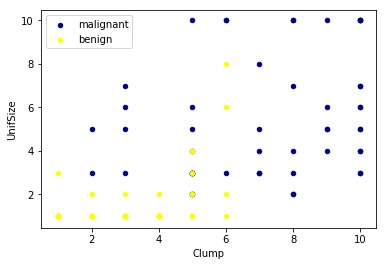

In [33]:
ax=data_df[data_df['Class'] == 4][0:50].plot(kind='scatter', x='Clump', y='UnifSize', color='DarkBlue', label='malignant');
ay=data_df[data_df['Class'] == 2][0:50].plot(kind='scatter', x='Clump', y='UnifSize', color='Yellow', label='benign', ax=ax);
plt.show()

# Data Preprocessing

Types of data...

In [34]:
data_df.dtypes

ID              int64
Clump           int64
UnifSize        int64
UnifShape       int64
MargAdh         int64
SingEpiSize     int64
BareNuc        object
BlandChrom      int64
NormNucl        int64
Mit             int64
Class           int64
dtype: object

It looks like the __BareNuc__ column includes some values that are not numerical. We can drop those rows:

In [41]:
data_df=data_df[pd.to_numeric(data_df['BareNuc'],errors='coerce').notnull()]

data_df['BareNuc']=data_df['BareNuc'].astype('int')

data_df.dtypes

ID             int64
Clump          int64
UnifSize       int64
UnifShape      int64
MargAdh        int64
SingEpiSize    int64
BareNuc        int32
BlandChrom     int64
NormNucl       int64
Mit            int64
Class          int64
dtype: object

In [50]:
features_df=data_df[['Clump', 'UnifSize', 'UnifShape', 'MargAdh', 'SingEpiSize', 'BareNuc', 'BlandChrom', 'NormNucl', 'Mit']]

selected_feat=np.asarray(features_df)

selected_feat[0:5]
X=selected_feat

Target is to predict whether patient belongs to benign(benign=2) or malignant(malignat=4) class.This field havve only two value and we need to change its measurement level to reflect this.

In [51]:
data_df['Class']=data_df['Class'].astype('int')

y=np.asarray(data_df['Class'])

y[0:5]

#y[30:35]

array([2, 2, 2, 2, 2])

### Split Dataset into Test Train

In [58]:
X_train, X_test,y_train, y_test=train_test_split(X,y,test_size=0.2, random_state=4 )

print('Train Set :',X_train.shape, y_train.shape )

print('Test Set :', X_test.shape,y_test.shape)


Train Set : (546, 9) (546,)
Test Set : (137, 9) (137,)


### Modeling SVM using Scikit Learn

SVM algorithm offers choice of kernels for its preprocessing.Mapping of data into higher dimensional space is called preprocessing.Mathematical function used for the preprocessing is named as __Kernel__, and can be of different types.Such as,

1. Linear
2. Polynomial
3. Radial Basis Function(RBF)
4. Sigmoid

Each of these function has different characteristics, pros and cons.But there is no easy process to find which function will perform best with any given dataset. In normal practice different functions are selected, and results are compared. Radial Bias Function is selected as default here.


In [59]:
from sklearn import svm

model_clf=svm.SVC(kernel='rbf')

model_clf.fit(X_train,y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

### Test/Predict

In [60]:
y_predicted=model_clf.predict(X_test)

y_predicted[0:5]

array([2, 4, 2, 4, 2])

### Evaluation of model performance

In [73]:
from sklearn.metrics import confusion_matrix, classification_report,f1_score,jaccard_similarity_score
import itertools

In [74]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

             precision    recall  f1-score   support

          2       1.00      0.94      0.97        90
          4       0.90      1.00      0.95        47

avg / total       0.97      0.96      0.96       137

Confusion matrix, without normalization
[[85  5]
 [ 0 47]]


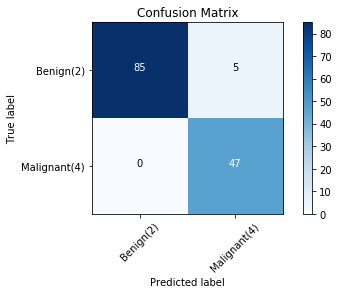

In [75]:
conf_mat=confusion_matrix(y_test,y_predicted, labels=[2,4])

np.set_printoptions(precision=2)


print (classification_report(y_test,y_predicted))

plt.figure()

plot_confusion_matrix(conf_mat,classes=['Benign(2)','Malignant(4)'],normalize=False,title='Confusion Matrix')

In [77]:
print("F1 Score : ", f1_score(y_test,y_predicted,average='weighted'))

print("Jaccard Similarity Score : " ,jaccard_similarity_score(y_test,y_predicted))

F1 Score :  0.9639038982104676
Jaccard Similarity Score :  0.9635036496350365
